In [1]:
# env py36
# import
import pandas as pd
import numpy as np
import hddm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pymc
import kabuki

sns.set(style="white")
%matplotlib inline
from tqdm import tqdm
import warnings

warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
print(hddm.__version__)

0.8.0


In [155]:
# load data. you will find this dataset in your hddm-folder under hddm/examples/rlddm_data.csv
data = hddm.load_csv("rlddm_false_choice_nosplit.csv")
# check structure
data.head()
# response: easy = 0; hard = 1
# q_init: demand_aversive = 0; no_demand_aversive = 1

,subj_idx,ChoiceRT,ChoiceDemand,TaskDemand,trial,DemandAversive_on,DemandAversive_off_T1,DemandAversive_off_T2,DemandAversive_off_T3,DemandAvoidance_true,response,rt,split_by,feedback,q_init
0,40,0.016550,easy,mid,1,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,1,0.016550,0,0.5,0.5
1,40,0.017136,hard,mid,2,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,0,0.017136,0,0.5,0.5
2,40,0.016106,easy,mid,3,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,1,0.016106,0,0.5,0.5
3,40,0.015544,hard,mid,4,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,0,0.015544,0,0.5,0.5
4,40,0.016076,hard,mid,5,no_demand_aversive,no_demand_aversive,demand_aversive,demand_aversive,demand_avoid,0,0.016076,0,0.5,0.5


In [140]:
# run the model by calling hddm.HDDMrl (instead of hddm.HDDM for normal HDDM)
m = hddm.HDDMrl(data)
# set sample and burn-in
m.sample(4000, burn=1500, dbname="traces.db", db="pickle")
# print stats to get an overview of posterior distribution of estimated parameters
m.print_stats()

 [-----------------100%-----------------] 4000 of 4000 complete in 1172.7 sec                      mean          std        2.5q         25q         50q         75q       97.5q       mc err
a                  0.11985   0.00405758    0.112178    0.117064    0.119724    0.122343    0.127958  9.69811e-05
a_std            0.0306476   0.00329988   0.0250479   0.0283207   0.0303039   0.0327549   0.0377951  9.89634e-05
a_subj.40         0.101722   0.00691719   0.0892781   0.0967902    0.101474    0.106153    0.116586  0.000176167
a_subj.42        0.0493049   0.00594235   0.0406903   0.0447423   0.0480334   0.0532199   0.0624848  0.000375266
a_subj.45        0.0874827   0.00667532   0.0756857   0.0828493   0.0871878   0.0917912    0.101161  0.000177844
a_subj.47          0.07389   0.00511432    0.064637    0.070382   0.0737197   0.0772227   0.0844146  0.000142818
a_subj.48        0.0674463   0.00493344   0.0583555   0.0640659   0.0670065   0.0705464   0.0778424  0.000130915
a_subj.49        0.

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting alpha
Plotting alpha_std


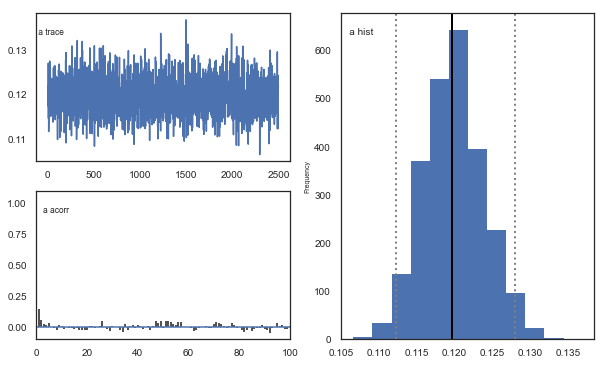

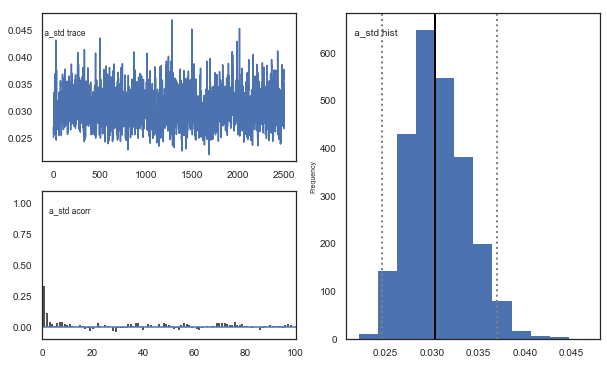

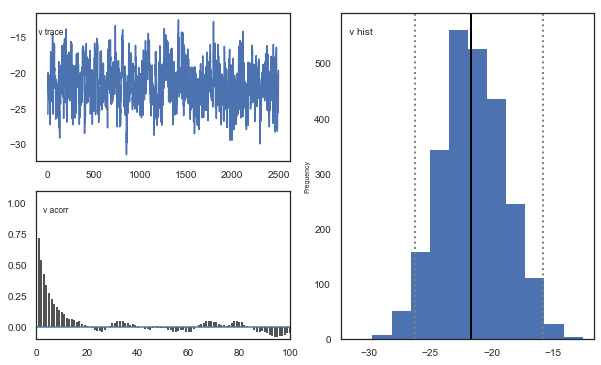

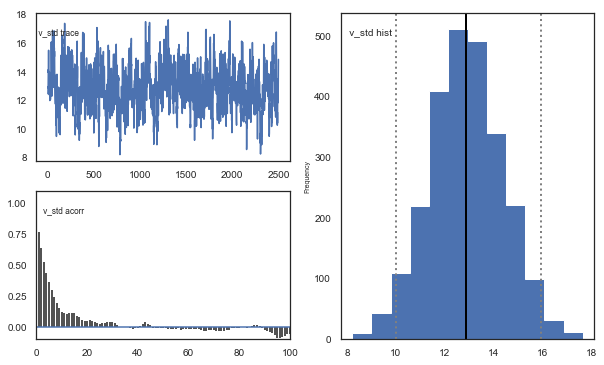

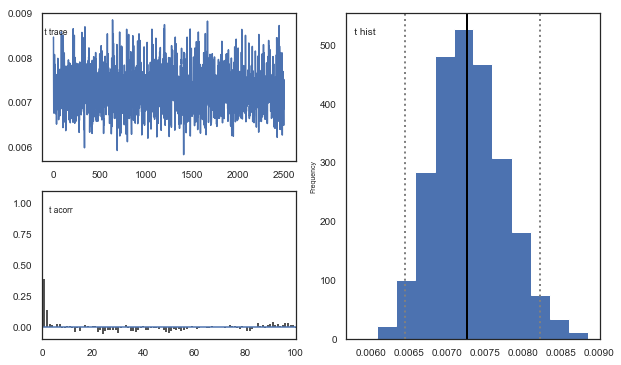

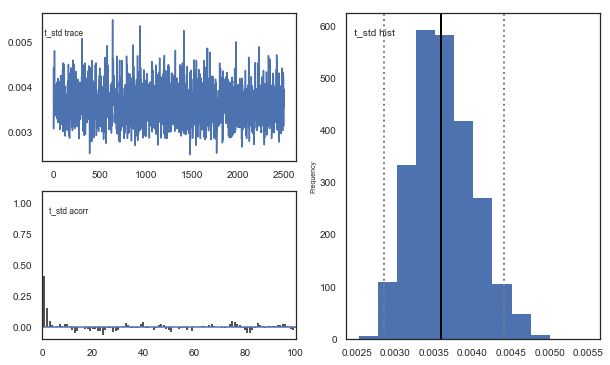

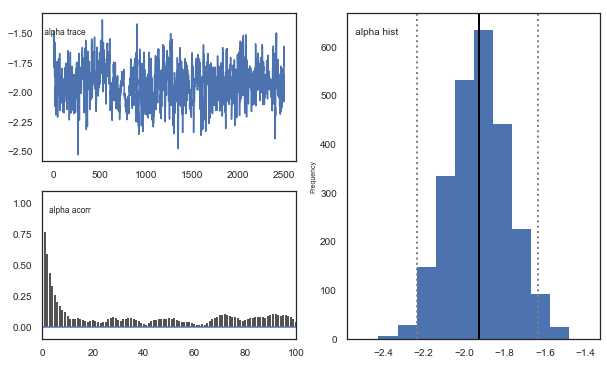

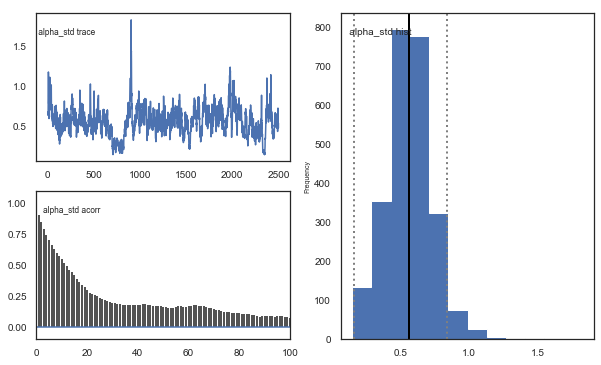

In [141]:
# plot the posteriors of parameters
m.plot_posteriors()

In [156]:
# estimate convergence
from kabuki.analyze import gelman_rubin

models = []
for i in range(3):
    m = hddm.HDDMrl(data=data)
    m.sample(4000, burn=1500, dbname="traces.db", db="pickle")
    models.append(m)

gelman_rubin(models)

 [-----------------100%-----------------] 4001 of 4000 complete in 972.0 secc

{'a': 1.0000201229305954,
 'a_std': 1.0011251192516395,
 'a_subj.40': 1.0015235962980598,
 'a_subj.42': 1.0128778694481508,
 'a_subj.45': 1.0017144549320791,
 'a_subj.47': 1.0007922057475944,
 'a_subj.48': 0.9999979173870741,
 'a_subj.49': 1.0001866789845877,
 'a_subj.50': 1.0000931146460947,
 'a_subj.52': 1.0001819732857904,
 'a_subj.54': 1.000742189361075,
 'a_subj.56': 1.001984558155477,
 'a_subj.57': 1.0008643666958343,
 'a_subj.58': 1.0006318440709905,
 'a_subj.59': 0.999980007244066,
 'a_subj.60': 1.0002930170094715,
 'a_subj.61': 1.0011644024048738,
 'a_subj.63': 1.000593945117192,
 'a_subj.64': 1.0020030637271469,
 'a_subj.65': 1.0007001571518708,
 'a_subj.66': 1.00044818618274,
 'a_subj.67': 1.0004914936512632,
 'a_subj.68': 0.9998224286323009,
 'a_subj.69': 0.999997774013403,
 'a_subj.70': 1.0006440344012577,
 'a_subj.71': 0.9999827931763969,
 'a_subj.72': 1.000294508318321,
 'a_subj.73': 0.9999374334154731,
 'a_subj.74': 0.9999512741106625,
 'a_subj.76': 1.0006736611056188,


In [157]:
np.max(list(gelman_rubin(models).values()))

1.0224495529309527

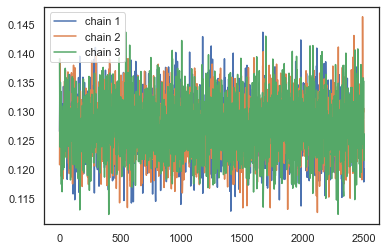

In [114]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['a'].values, label='chain 1')
ax.plot(models[1].get_traces()['a'].values, label='chain 2')
ax.plot(models[2].get_traces()['a'].values, label='chain 3')
ax.legend()

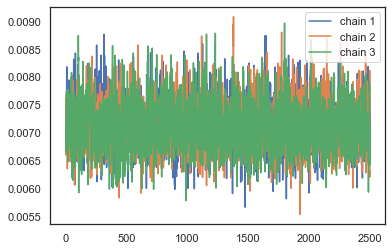

In [115]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['t'].values, label='chain 1')
ax.plot(models[1].get_traces()['t'].values, label='chain 2')
ax.plot(models[2].get_traces()['t'].values, label='chain 3')
ax.legend()

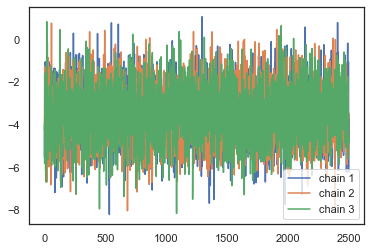

In [116]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['v'].values, label='chain 1')
ax.plot(models[1].get_traces()['v'].values, label='chain 2')
ax.plot(models[2].get_traces()['v'].values, label='chain 3')
ax.legend()

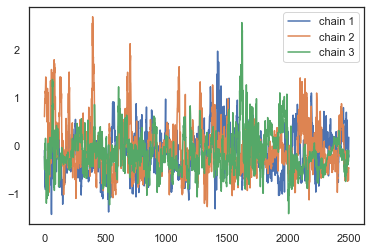

In [117]:
fig, ax = plt.subplots(1)

ax.plot(models[0].get_traces()['alpha'].values, label='chain 1')
ax.plot(models[1].get_traces()['alpha'].values, label='chain 2')
ax.plot(models[2].get_traces()['alpha'].values, label='chain 3')
ax.legend()

In [158]:
# Combine the models we ran to test for convergence.
m = kabuki.utils.concat_models(models)

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


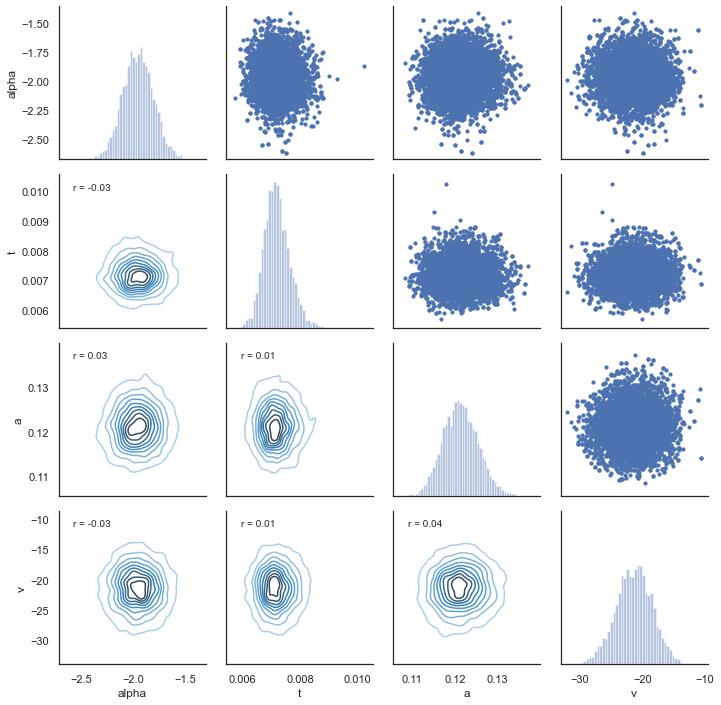

In [159]:
alpha, t, a, v = m.nodes_db.node[["alpha", "t", "a", "v"]]
samples = {"alpha": alpha.trace(), "t": t.trace(), "a": a.trace(), "v": v.trace()}
samp = pd.DataFrame(data=samples)


def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r), xy=(0.1, 0.9), xycoords=ax.transAxes)


g = sns.PairGrid(samp, palette=["red"])
g.map_upper(plt.scatter, s=10) # marker size
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
g.savefig("matrix_plot.png")

In [160]:
m.dic

-26347.384881527145

In [147]:
# Posterior predictive check

In [161]:
traces = m.get_traces()
traces.head()

,a,a_std,a_subj.40,a_subj.42,a_subj.45,a_subj.47,a_subj.48,a_subj.49,a_subj.50,a_subj.52,...,alpha_subj.118,alpha_subj.119,alpha_subj.120,alpha_subj.121,alpha_subj.122,alpha_subj.123,alpha_subj.125,alpha_subj.126,alpha_subj.127,alpha_subj.130
0,0.116154,0.028270,0.103359,0.044931,0.190747,0.077107,0.068307,0.086473,0.062076,0.077015,...,-1.503403,-1.531255,-2.002497,-1.919370,-1.572004,-2.254980,-1.640762,-2.351571,-2.317477,-2.067596
1,0.113188,0.033146,0.094879,0.052337,0.173525,0.076617,0.070753,0.081081,0.064909,0.079764,...,-1.892873,-1.541629,-2.242055,-1.583715,-3.009662,-2.115717,-1.614982,-2.245014,-1.875110,-2.432083
2,0.125104,0.033061,0.098165,0.053629,0.180577,0.074963,0.069415,0.072371,0.067987,0.087825,...,-2.082549,-2.543176,-1.914814,-1.339757,-2.525948,-1.798826,-2.016961,-2.060660,-1.527058,-2.083705
3,0.126268,0.031144,0.101609,0.053586,0.174727,0.073650,0.068842,0.066159,0.066681,0.081752,...,-1.915093,-2.479827,-2.233203,-2.245997,-1.989615,-1.850721,-1.585261,-2.393961,-2.170316,-2.067620
4,0.117117,0.030247,0.100329,0.060429,0.177978,0.077459,0.067059,0.077815,0.062682,0.084634,...,-2.133475,-2.142514,-2.221493,-2.037438,-2.737857,-2.240125,-1.716986,-2.257304,-1.469355,-2.137447


In [ ]:
from tqdm import tqdm  # progress tracker

# create empty dataframe to store simulated data
sim_data = pd.DataFrame()
# create a column samp to be used to identify the simulated data sets
data["samp"] = 0
# load traces
traces = m.get_traces()
# decide how many times to repeat simulation process. repeating this multiple times is generally recommended,
# as it better captures the uncertainty in the posterior distribution, but will also take some time
for i in tqdm(range(1, 101)):
    # randomly select a row in the traces to use for extracting parameter values
    sample = np.random.randint(0, traces.shape[0] - 1)
    # loop through all subjects in observed data
    for s in data.subj_idx.unique():
        # get number of trials for each condition.
        size0 = len(
            data[(data["subj_idx"] == s) & (data["split_by"] == 0)].trial.unique()
        )
        # set parameter values for simulation
        a = traces.loc[sample, "a_subj." + str(s)]
        t = traces.loc[sample, "t_subj." + str(s)]
        scaler = traces.loc[sample, "v_subj." + str(s)]
        alphaInv = traces.loc[sample, "alpha_subj." + str(s)]
        # take inverse logit of estimated alpha
        alpha = np.exp(alphaInv) / (1 + np.exp(alphaInv))
        # simulate data for each condition changing only values of size, p_upper, p_lower and split_by between conditions.
        sim_data0 = hddm.generate.gen_rand_rlddm_data(
            a=a,
            t=t,
            scaler=scaler,
            alpha=alpha,
            p_upper=1,
            p_lower=0,
            split_by=0,
            size=size0,
        )
        # assign subj_idx
        sim_data0["subj_idx"] = s
        # identify that these are simulated data
        sim_data0["type"] = "simulated"
        # identify the simulated data
        sim_data0["samp"] = i
        # append data from each subject
        sim_data = sim_data.append(sim_data0, ignore_index=True)
# combine observed and simulated data
ppc_data = data[
    ["subj_idx", "response", "split_by", "rt", "trial", "feedback", "samp"]
].copy()
ppc_data["type"] = "observed"
ppc_sdata = sim_data[
    ["subj_idx", "response", "split_by", "rt", "trial", "feedback", "type", "samp"]
].copy()
ppc_data = ppc_data.append(ppc_sdata)
ppc_data.to_csv("ppc_data_false_choice.csv")

 94%|█████████▍| 94/100 [42:28<03:28, 34.79s/it]

In [150]:
ppc_data

,subj_idx,response,split_by,rt,trial,feedback,samp,type
0,40,0.0,0,0.016550,1,0.5,0,observed
1,40,1.0,0,0.017136,2,0.5,0,observed
2,40,0.0,0,0.016106,3,0.5,0,observed
3,40,1.0,0,0.015544,4,0.5,0,observed
4,40,1.0,0,0.016076,5,0.5,0,observed
...,...,...,...,...,...,...,...,...
317895,130,0.0,0,0.024742,46,0.0,100,simulated
317896,130,0.0,0,0.020742,47,0.0,100,simulated
317897,130,0.0,0,0.022742,48,0.0,100,simulated
317898,130,0.0,0,0.021742,49,0.0,100,simulated


In [151]:
plot_ppc_data = ppc_data.copy()

In [152]:
# bin trials to for smoother estimate of response proportion across learning
plot_ppc_data["bin_trial"] = pd.cut(
    plot_ppc_data.trial, 50, labels=np.linspace(1, 51, 50)
).astype("int64")
# calculate means for each sample
sums = (
    plot_ppc_data.groupby(["bin_trial", "split_by", "samp", "type"])
    .mean()
    .reset_index()
)
# calculate the overall mean response across samples
ppc_sim = sums.groupby(["bin_trial", "split_by", "type"]).mean().reset_index()
# initiate columns that will have the upper and lower bound of the hpd
ppc_sim["upper_hpd"] = 0
ppc_sim["lower_hpd"] = 0
for i in range(0, ppc_sim.shape[0]):
    # calculate the hpd/hdi of the predicted mean responses across bin_trials
    hdi = pymc.utils.hpd(
        sums.response[
            (sums["bin_trial"] == ppc_sim.bin_trial[i])
            & (sums["split_by"] == ppc_sim.split_by[i])
            & (sums["type"] == ppc_sim.type[i])
        ],
        alpha=0.1,
    )
    ppc_sim.loc[i, "upper_hpd"] = hdi[1]
    ppc_sim.loc[i, "lower_hpd"] = hdi[0]
# calculate error term as the distance from upper bound to mean
ppc_sim["up_err"] = ppc_sim["upper_hpd"] - ppc_sim["response"]
ppc_sim["low_err"] = ppc_sim["response"] - ppc_sim["lower_hpd"]
ppc_sim["model"] = "RLDDM_single_learning"
ppc_sim.to_csv("ppc_sim_false_choice.csv")

In [153]:
# ppc_sim['trialbins'] = pd.qcut(ppc_sim.trial, 10, labels=False)

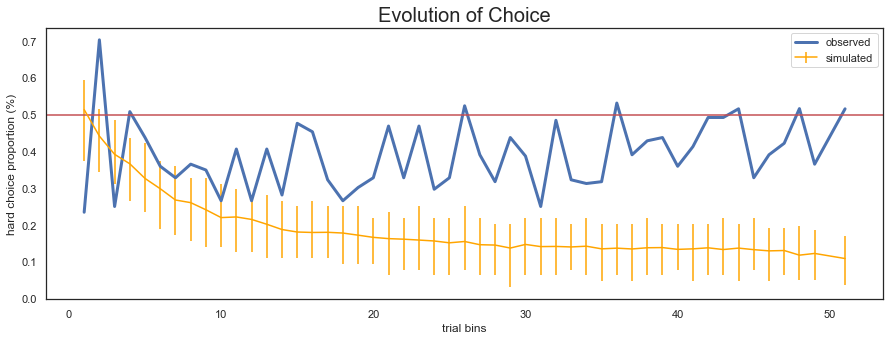

In [154]:
# plotting evolution of choice proportion for best option across learning for observed and simulated data.
fig, axs = plt.subplots(figsize=(15, 5), nrows=1, ncols=1, sharex=True, sharey=True)
for i in range(1):
    ax = axs
    d = ppc_sim[(ppc_sim.split_by == i) & (ppc_sim.type == "simulated")]
    ax.errorbar(
        d.bin_trial,
        d.response,
        yerr=[d.low_err, d.up_err],
        label="simulated",
        color="orange",
    )
    d = ppc_sim[(ppc_sim.split_by == i) & (ppc_sim.type == "observed")]
    ax.plot(d.bin_trial, d.response, linewidth=3, label="observed")
    ax.axhline(y=0.5, color='r')
#     ax.set_title("split_by = %i" % i, fontsize=20)
    axs.set_title("Evolution of Choice", fontsize=20)
    ax.set_ylabel("hard choice proportion (%)")
    ax.set_xlabel("trial bins")
plt.legend()
# plt.xticks(ticks=(1,2,3,4,5))
# fig.savefig("PPCchoice.pdf")

/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/ottolab/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.01 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


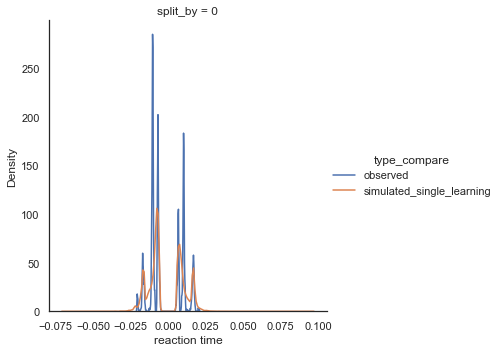

In [20]:
plot_ppc_data["type_compare"] = np.where(
    plot_ppc_data["type"] == "observed",
    plot_ppc_data["type"],
    "simulated_single_learning",
)
dual_vs_single_pcc = plot_ppc_data
dual_vs_single_pcc["reaction time"] = np.where(
    dual_vs_single_pcc["response"] == 1,
    dual_vs_single_pcc.rt,
    0 - dual_vs_single_pcc.rt,
)
# plotting evolution of choice proportion for best option across learning for observed and simulated data. We use bins of trials because plotting individual trials would be very noisy.
g = sns.FacetGrid(dual_vs_single_pcc, col="split_by", hue="type_compare", height=5)
g.map(sns.kdeplot, "reaction time", bw=0.01).set_ylabels("Density")
g.add_legend()

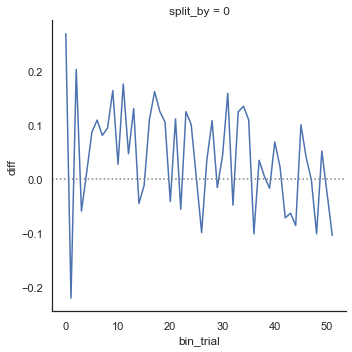

In [21]:
# rlddm
error_prediction = (
    plot_ppc_data.groupby(["split_by", "type", "bin_trial"])["response"]
    .mean()
    .reset_index()
)
ep_rlddm = error_prediction.pivot_table(
    index=["split_by", "bin_trial"], columns="type", values="response"
).reset_index()
ep_rlddm["diff"] = ep_rlddm["simulated"] - ep_rlddm["observed"]
ep_rlddm["model"] = "RLDDM"
# plot
g = sns.relplot(
    x="bin_trial",
    y="diff",
    col="split_by",
#     hue="model",
    kind="line",
    ci=False,
    data=ep_rlddm,
    palette="Set2_r",
)
g.map(plt.axhline, y=0, ls=":", c=".5")